In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Family Income and Expenditure.csv')
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,ID
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,0,0,0,2,1,0,0,1,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,1,0,0,0,3,1,0,0,2,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,3
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,1,0,0,0,0,4
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,0,0,0,0,3,0,0,0,1,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 61 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [4]:
#describe the goal variable

df['Total Household Income'].describe()

count    4.154400e+04
mean     2.475556e+05
std      2.868805e+05
min      1.128500e+04
25%      1.048950e+05
50%      1.640795e+05
75%      2.911385e+05
max      1.181599e+07
Name: Total Household Income, dtype: float64

In [5]:
#get the average monthly income of the dataset

df['Total Household Income'].mean()/12

20629.632066804672

<AxesSubplot: xlabel='Total Household Income'>

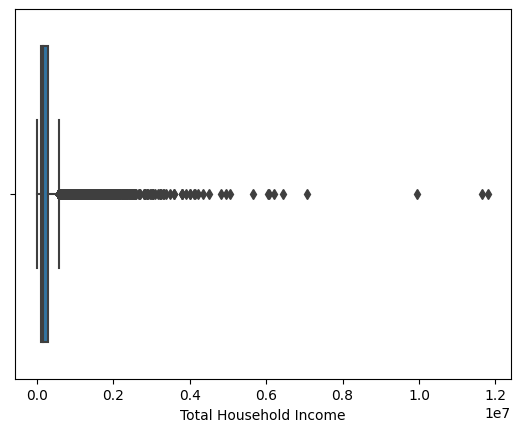

In [6]:
sb.boxplot(x=df['Total Household Income'])

Skewness: 8.896631


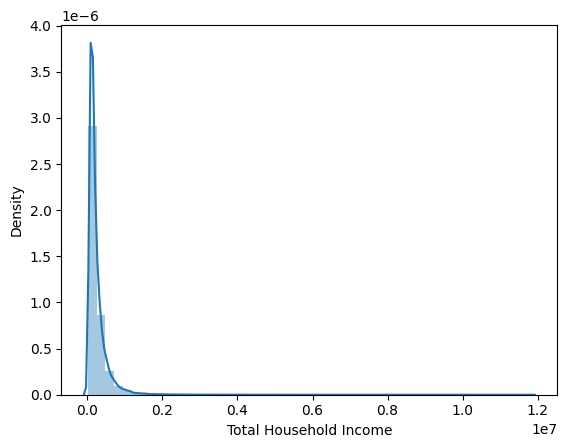

In [7]:
sb.distplot(df['Total Household Income'])
print("Skewness: %f" % df['Total Household Income'].skew())

<AxesSubplot: >

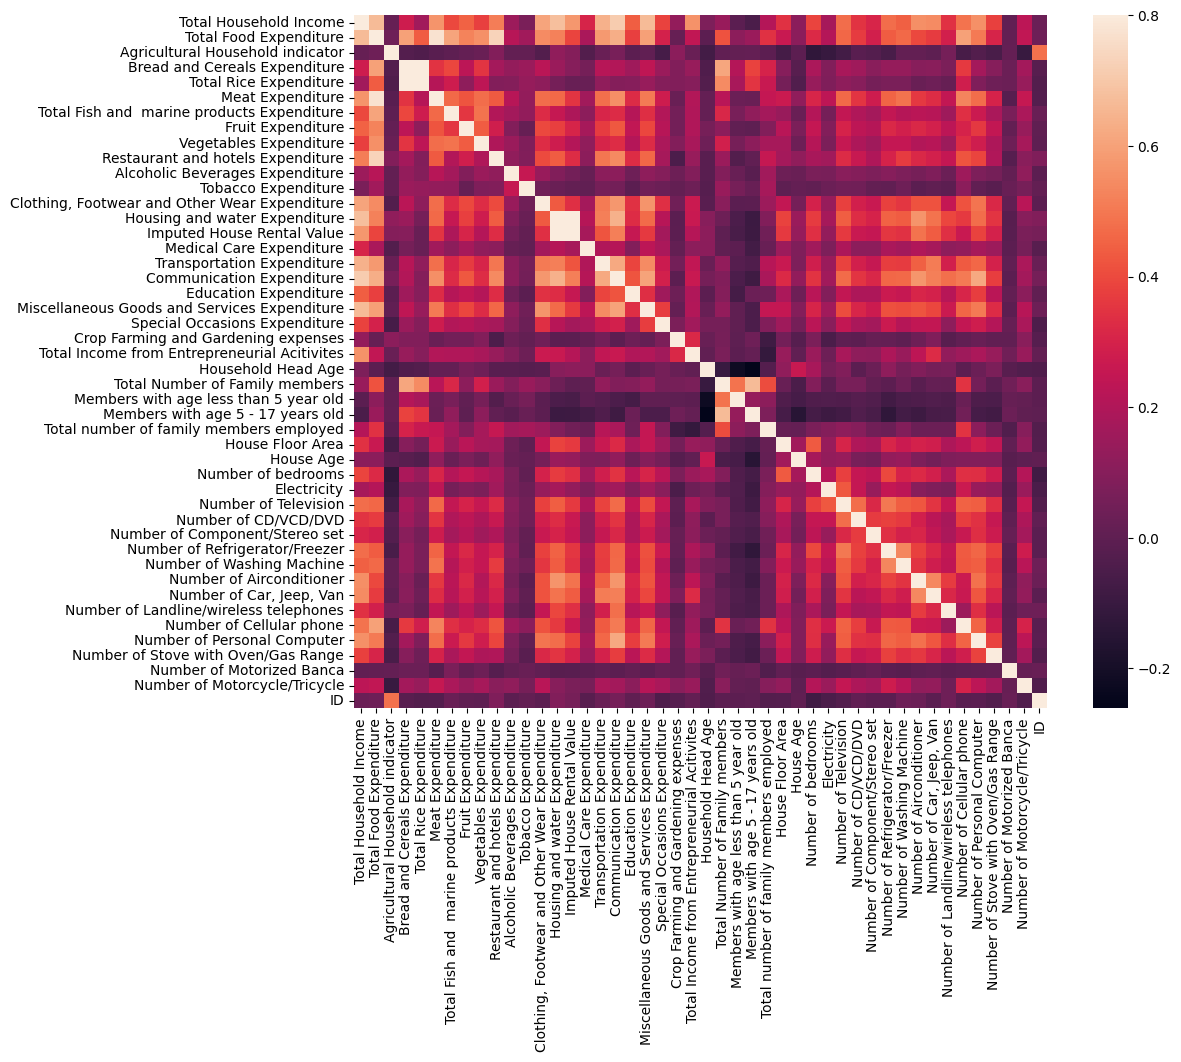

In [8]:
hm = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(hm, vmax=.8, square=True)


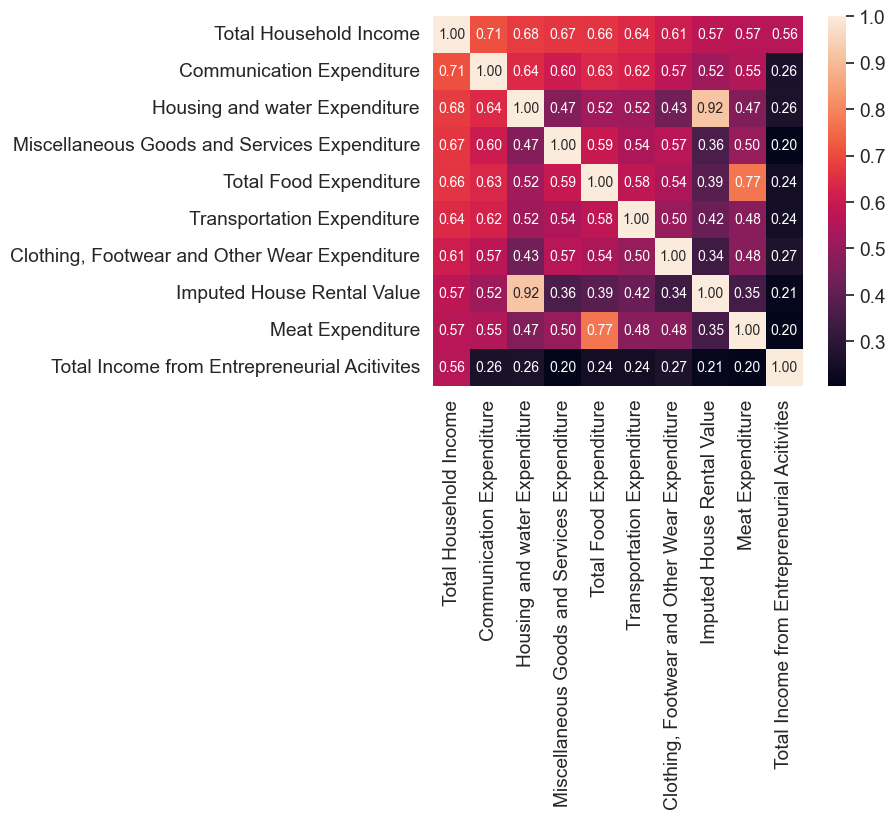

In [9]:
k = 10
cols = hm.nlargest(k, 'Total Household Income')['Total Household Income'].index
cm = np.corrcoef(df[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



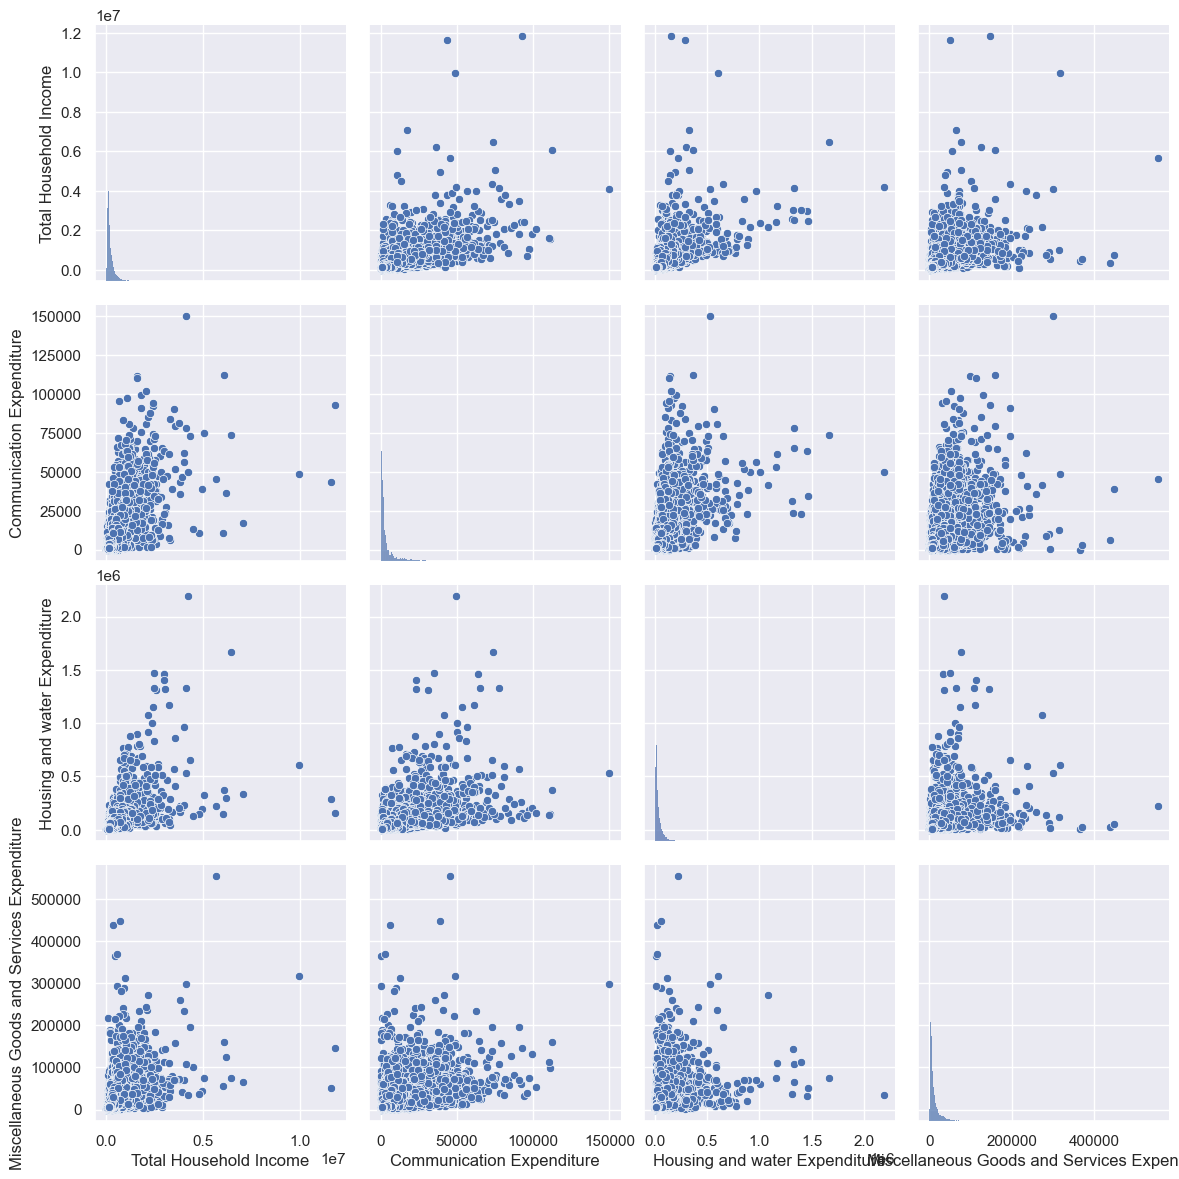

In [10]:
sb.set()
sb.pairplot(df[cols[:4]], size = 3)
plt.show()

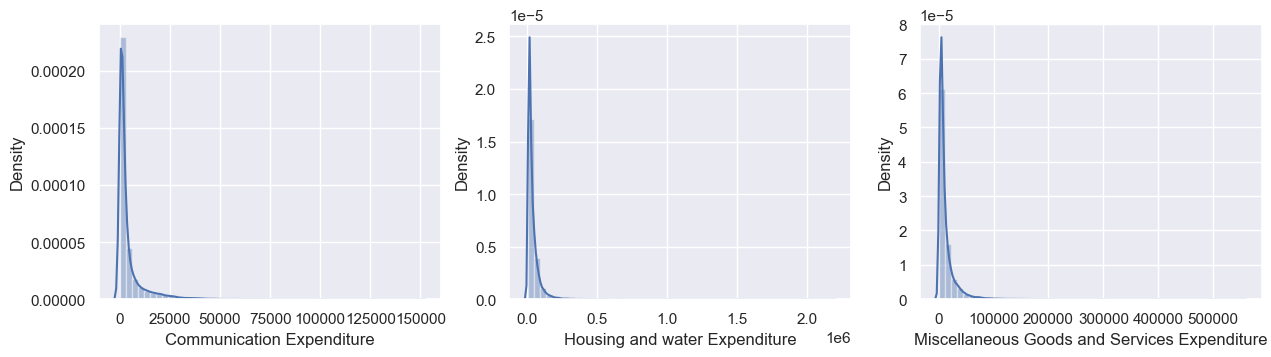

In [11]:
plt.figure(figsize=(15,25))
i=1
for exp in ['Communication Expenditure','Housing and water Expenditure','Miscellaneous Goods and Services Expenditure']:
  plt.subplot(6,3,i)
  sb.distplot(df[exp])
  i+=1

In [28]:
X=df[['Communication Expenditure','Housing and water Expenditure','Miscellaneous Goods and Services Expenditure']]
y=df['Total Household Income']
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(41544, 3)
(33235, 3) (8309, 3) (33235,) (8309,)


In [24]:
rf = RandomForestRegressor(n_estimators=100,random_state=0, verbose=True)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.8s finished


RandomForestRegressor(random_state=0, verbose=True)

In [25]:
rf.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


0.6909103500131878

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


[Text(0.5, 0, 'Total Household Income'),
 Text(0, 0.5, 'Predicted Total Household Income')]

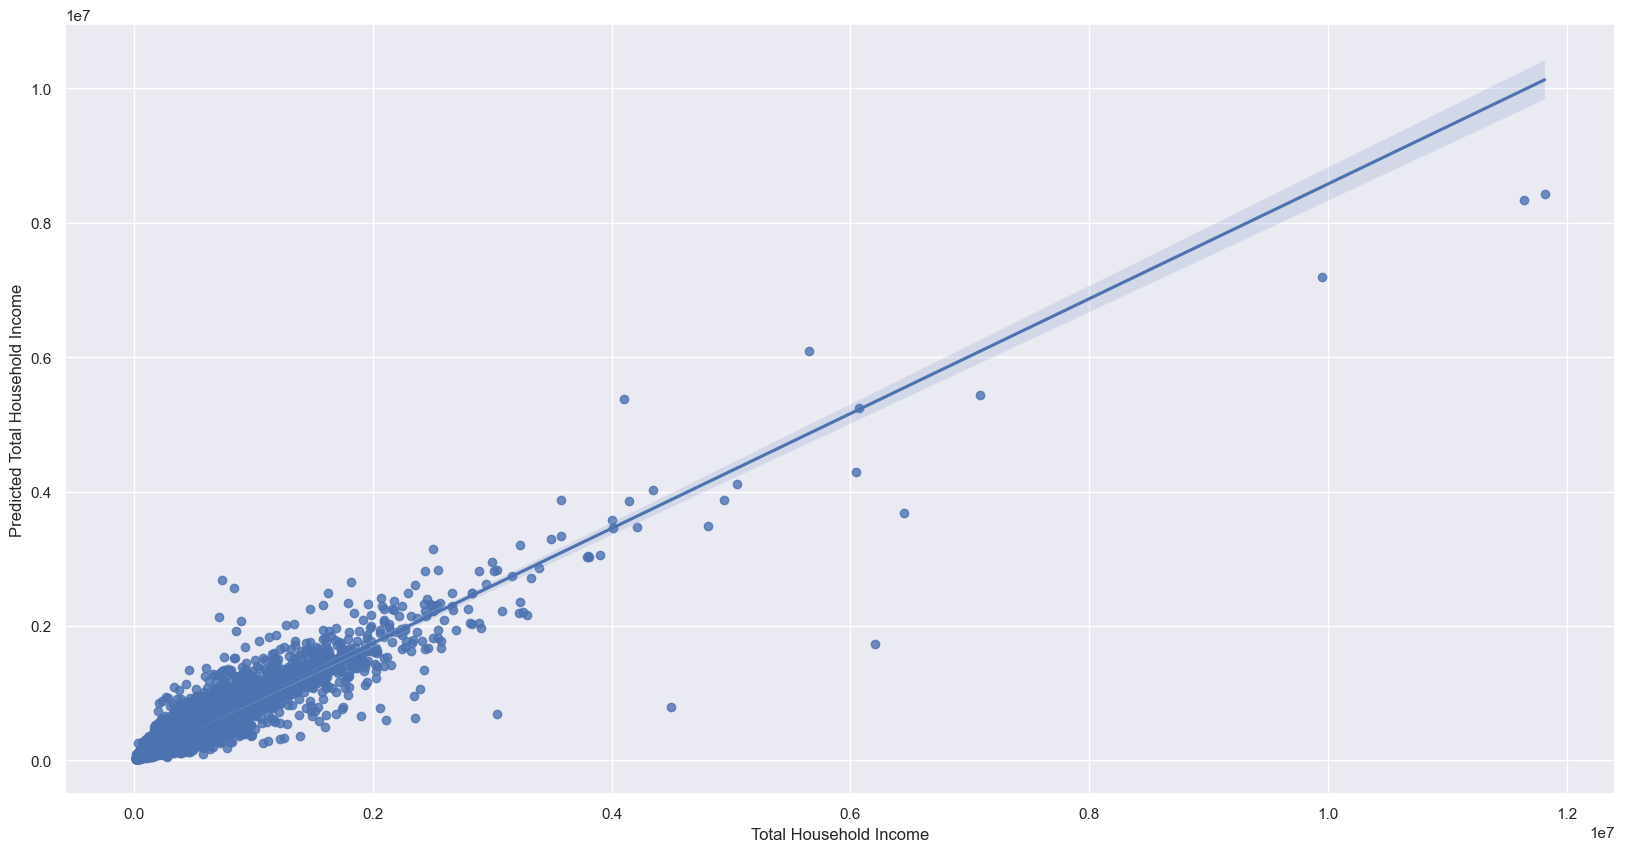

In [31]:
y_predict = rf.predict(X)
mean_squared_error(y, y_predict)
plt.figure(figsize=(20,10))
ax = sb.regplot(x=y, y=y_predict)
ax.set(xlabel='Total Household Income',ylabel='Predicted Total Household Income')

7921667103.009251
